# Quantum Volume (QV) Benchmark Example

In [1]:
%load_ext autoreload
%autoreload 2

# Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

#### Set IQM Token if using Resonance.

In [3]:
# import os
# os.environ["IQM_TOKEN"] = ""

# Quantum Volume Configuration

In [4]:
from iqm.benchmarks.quantum_volume.quantum_volume import *

In [5]:
EXAMPLE_QV = QuantumVolumeConfiguration(
    num_circuits=500,
    shots=2**8,
    calset_id=None,
    num_sigmas=2,
    choose_qubits_routine="custom",
    custom_qubits_array=[[0,1,2,3], [0,1,3,4]],
    qiskit_optim_level=3,
    optimize_sqg=True,
    routing_method="sabre",
    physical_layout="fixed",
    max_gates_per_batch=60_000,
    rem=True,
    mit_shots=1_000,
)

# Run the experiment

In [6]:
benchmark_qv = QuantumVolumeBenchmark(backend, EXAMPLE_QV)
run0_qv = benchmark_qv.run()

2024-12-18 13:25:20,041 - iqm.benchmarks.logging_config - INFO - Executing QV on qubits [0, 1, 2, 3]
2024-12-18 13:25:20,788 - iqm.benchmarks.logging_config - INFO - Successfully generated all 500 circuits to be executed
2024-12-18 13:25:20,789 - iqm.benchmarks.logging_config - INFO - Will transpile according to "fixed" physical layout
2024-12-18 13:25:20,789 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2024-12-18 13:25:51,547 - iqm.benchmarks.logging_config - INFO - Submitting batch with 500 circuits corresponding to qubits [0, 1, 2, 3]
2024-12-18 13:25:51,576 - iqm.benchmarks.logging_config - INFO - max_gates_per_batch restriction: submitting subbatch #1 with 500 circuits corresponding to qubits [0, 1, 2, 3]
2024-12-18 13:25:51,583 - iqm.benchmarks.logging_config - INFO - Job for layout [0, 1, 2, 3] submitted successfully!
2024-12-18 13:25:51,600 - iqm.benchmarks

One can perform a separate run of the benchmark (also possible with a different configuration)

In [7]:
#run1_qv = benchmark_qv.run()

# Perform Analysis

In [8]:
result0_qv = benchmark_qv.analyze()

2024-12-18 13:27:04,660 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [0, 1, 2, 3]
2024-12-18 13:27:06,675 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [0, 1, 3, 4]
2024-12-18 13:27:08,611 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [0, 1, 2, 3] with 1000 shots
2024-12-18 13:27:08,676 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [0, 1, 3, 4] with 1000 shots


In [9]:
#result1_qv = benchmark.analyze(run_index=0)

List all the keys in the attributes of the dataset

In [10]:
attr_keys = sorted([str(x) for x in list(result0_qv.dataset.attrs.keys())])
for k in attr_keys:
    print(k)

0
1
REM_quasidistributions
backend_configuration_name
backend_name
benchmark
calset_id
choose_qubits_routine
custom_qubits_array
execution_timestamp
max_gates_per_batch
mit_shots
num_circuits
num_sigmas
optimize_sqg
physical_layout
qiskit_optim_level
rem
routing_method
session_timestamp
shots


The data for specific experiments is indexed by 0,1,..., e.g., for the first experiment:

In [11]:
for k in result0_qv.dataset.attrs[0].keys():
    print(k)

qubits
qv_results_type
time_circuit_generation
time_transpilation
time_batching
time_submit
time_retrieve
all_job_metadata
operation_counts
cumulative_average_heavy_output_probability
cumulative_stddev_heavy_output_probability
heavy_output_probabilities
REM_cumulative_average_heavy_output_probability
REM_cumulative_stddev_heavy_output_probability
REM_heavy_output_probabilities


In [12]:
result0_qv.dataset.attrs[0]["heavy_output_probabilities"]

[0.66796875,
 0.6796875,
 0.61328125,
 0.8359375,
 0.62890625,
 0.65625,
 0.67578125,
 0.66015625,
 0.7421875,
 0.70703125,
 0.66796875,
 0.64453125,
 0.79296875,
 0.58203125,
 0.58984375,
 0.6328125,
 0.60546875,
 0.60546875,
 0.62109375,
 0.68359375,
 0.68359375,
 0.6875,
 0.55859375,
 0.64453125,
 0.578125,
 0.640625,
 0.61328125,
 0.57421875,
 0.625,
 0.703125,
 0.63671875,
 0.75390625,
 0.65625,
 0.72265625,
 0.640625,
 0.60546875,
 0.62109375,
 0.66015625,
 0.5390625,
 0.70703125,
 0.62890625,
 0.8984375,
 0.66015625,
 0.6953125,
 0.625,
 0.625,
 0.734375,
 0.90625,
 0.65234375,
 0.671875,
 0.78515625,
 0.6484375,
 0.6328125,
 0.59765625,
 0.7734375,
 0.625,
 0.66015625,
 0.59375,
 0.68359375,
 0.50390625,
 0.6171875,
 0.65625,
 0.5625,
 0.56640625,
 0.625,
 0.5625,
 0.70703125,
 0.6015625,
 0.62890625,
 0.6171875,
 0.625,
 0.66015625,
 0.75,
 0.69921875,
 0.703125,
 0.64453125,
 0.60546875,
 0.73828125,
 0.66796875,
 0.63671875,
 0.73046875,
 0.5703125,
 0.6015625,
 0.6171875,
 

The observation object contains the benchmark results

In [13]:
result0_qv.observations

[BenchmarkObservation(name='average_heavy_output_probability', value=0.6479296875, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 2, 3]), uncertainty=0.021359625818639816),
 BenchmarkObservation(name='is_succesful', value=False, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 2, 3]), uncertainty=None),
 BenchmarkObservation(name='QV_result', value=1, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 2, 3]), uncertainty=None),
 BenchmarkObservation(name='average_heavy_output_probability', value=0.669, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 3, 4]), uncertainty=0.02104466678282172),
 BenchmarkObservation(name='is_succesful', value=False, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 3, 4]), uncertainty=None),
 BenchmarkObservation(name='QV_result', value=1, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 3, 4]), uncertainty=None),
 BenchmarkObservation(name='REM_average_heavy_output_probabi

# Generate plots

In [14]:
for k in result0_qv.plots.keys():
    print(k)

vanilla_4_qubits_[0, 1, 2, 3]
vanilla_4_qubits_[0, 1, 3, 4]
vanilla_REM_4_qubits_[0, 1, 2, 3]
vanilla_REM_4_qubits_[0, 1, 3, 4]


Print a specific output

In [15]:
# result0_qv.plots["vanilla_4_qubits_[0, 1, 3, 4]"]

Or print all the plots at once

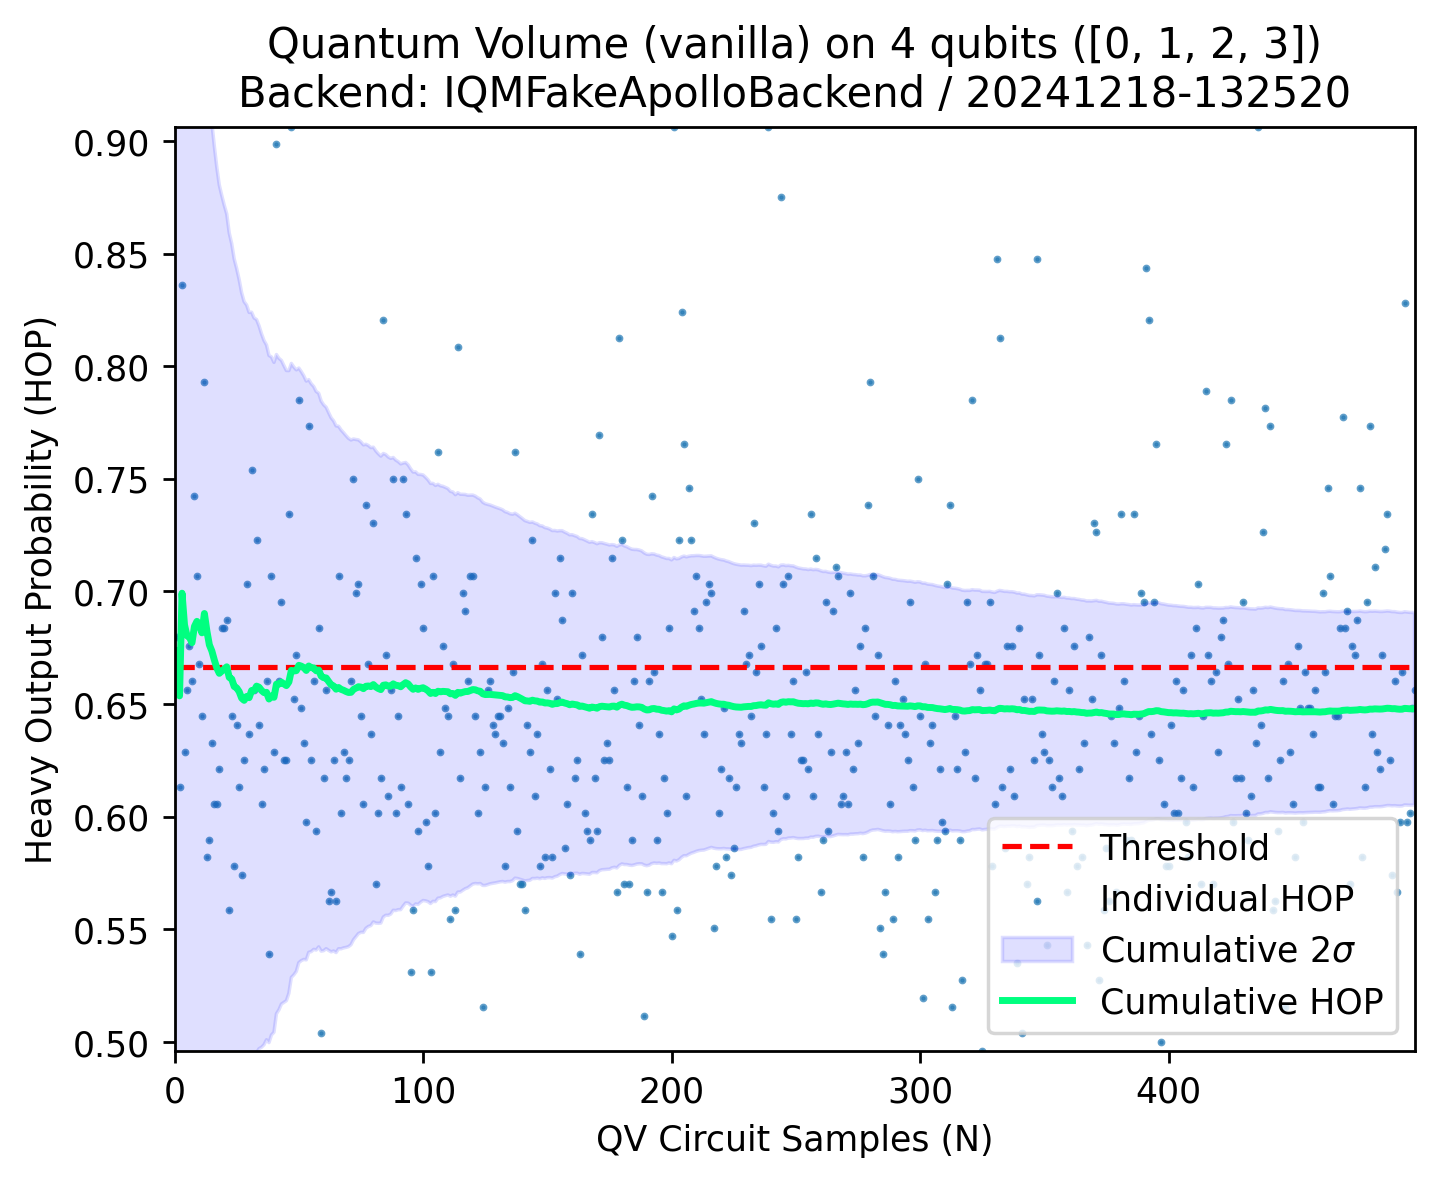

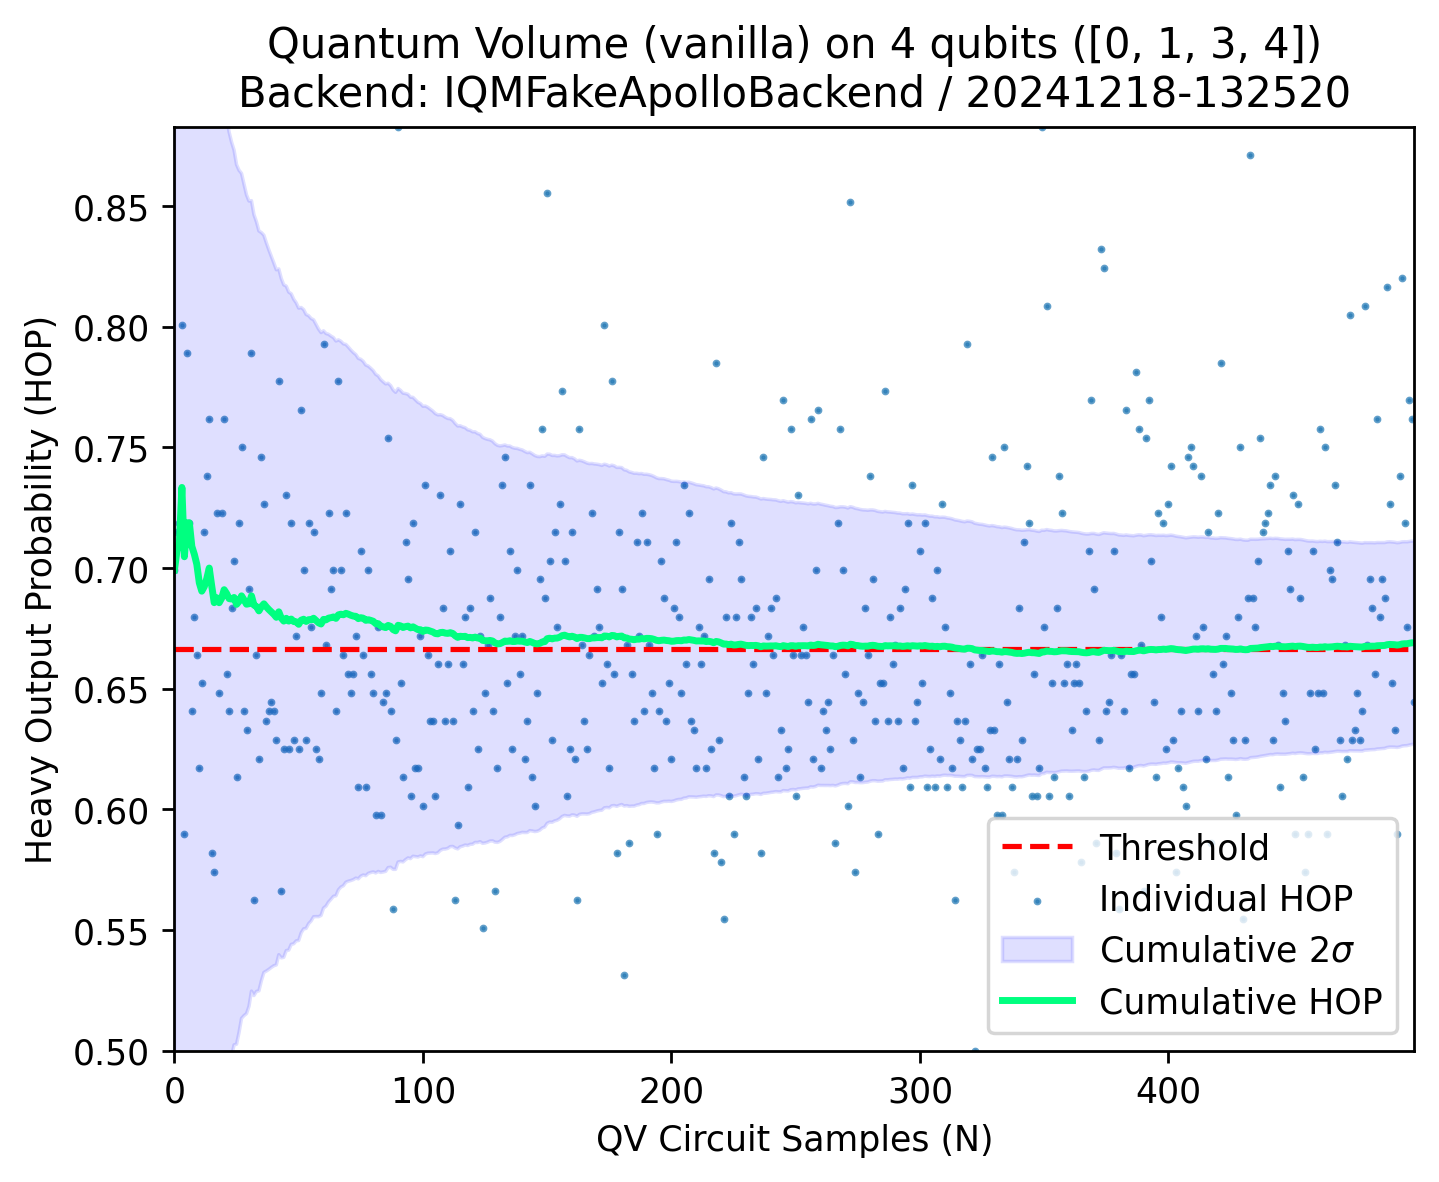

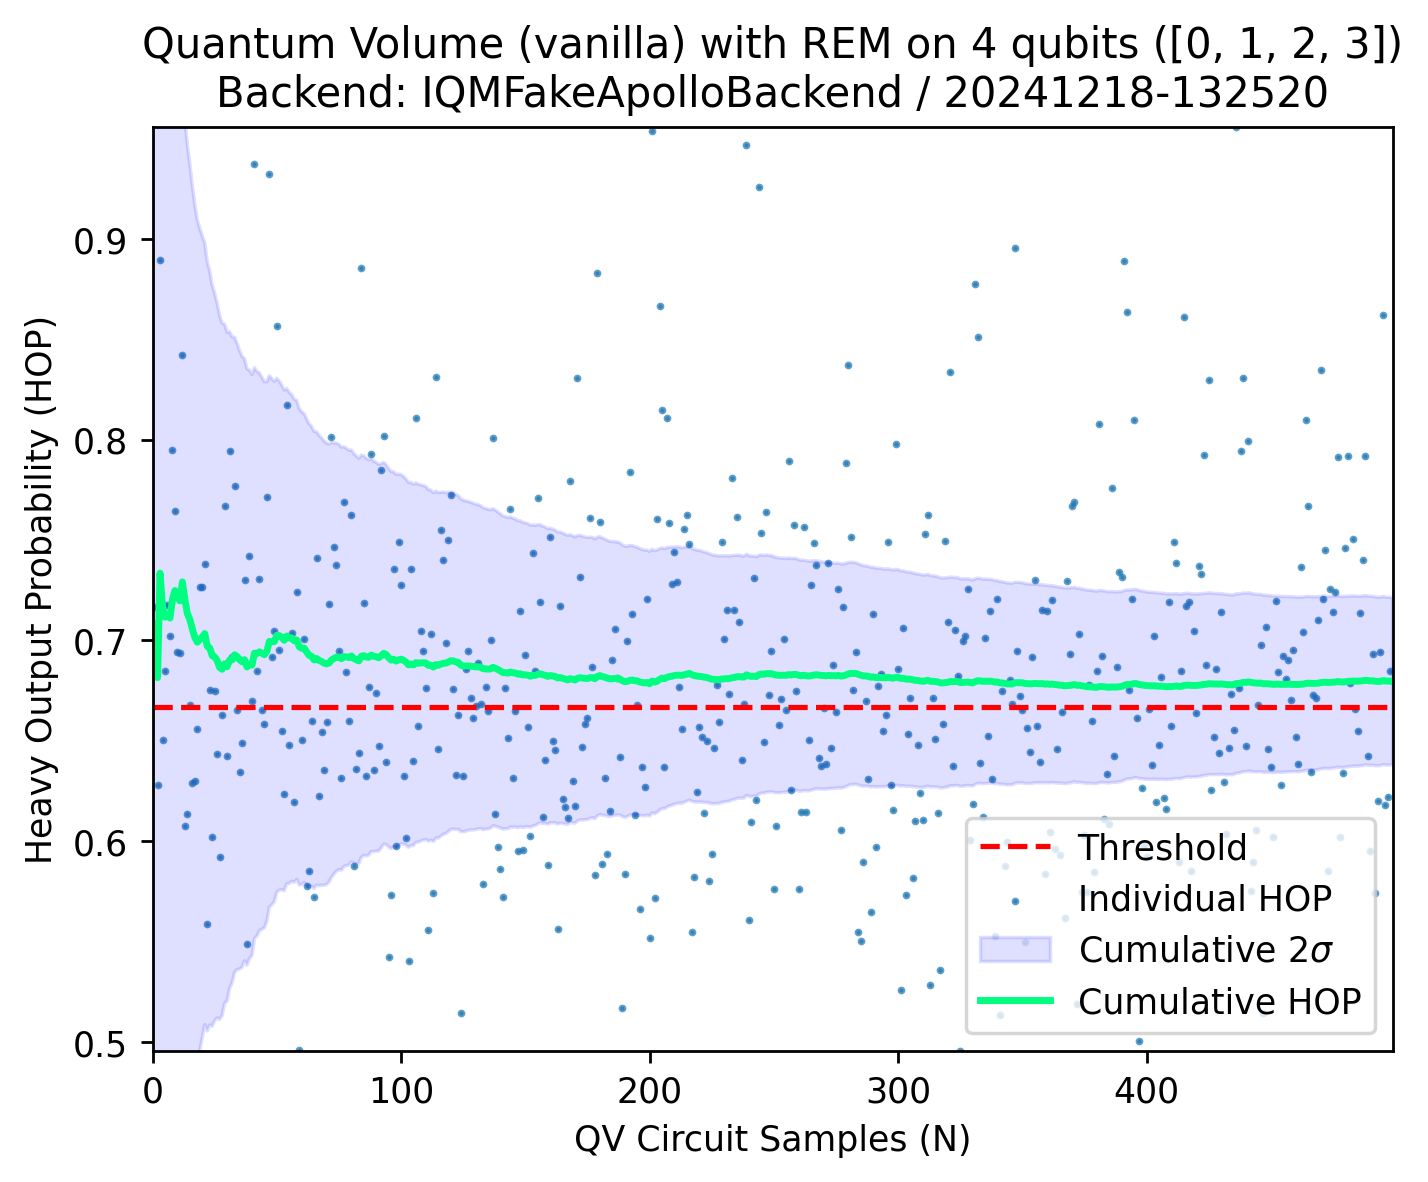

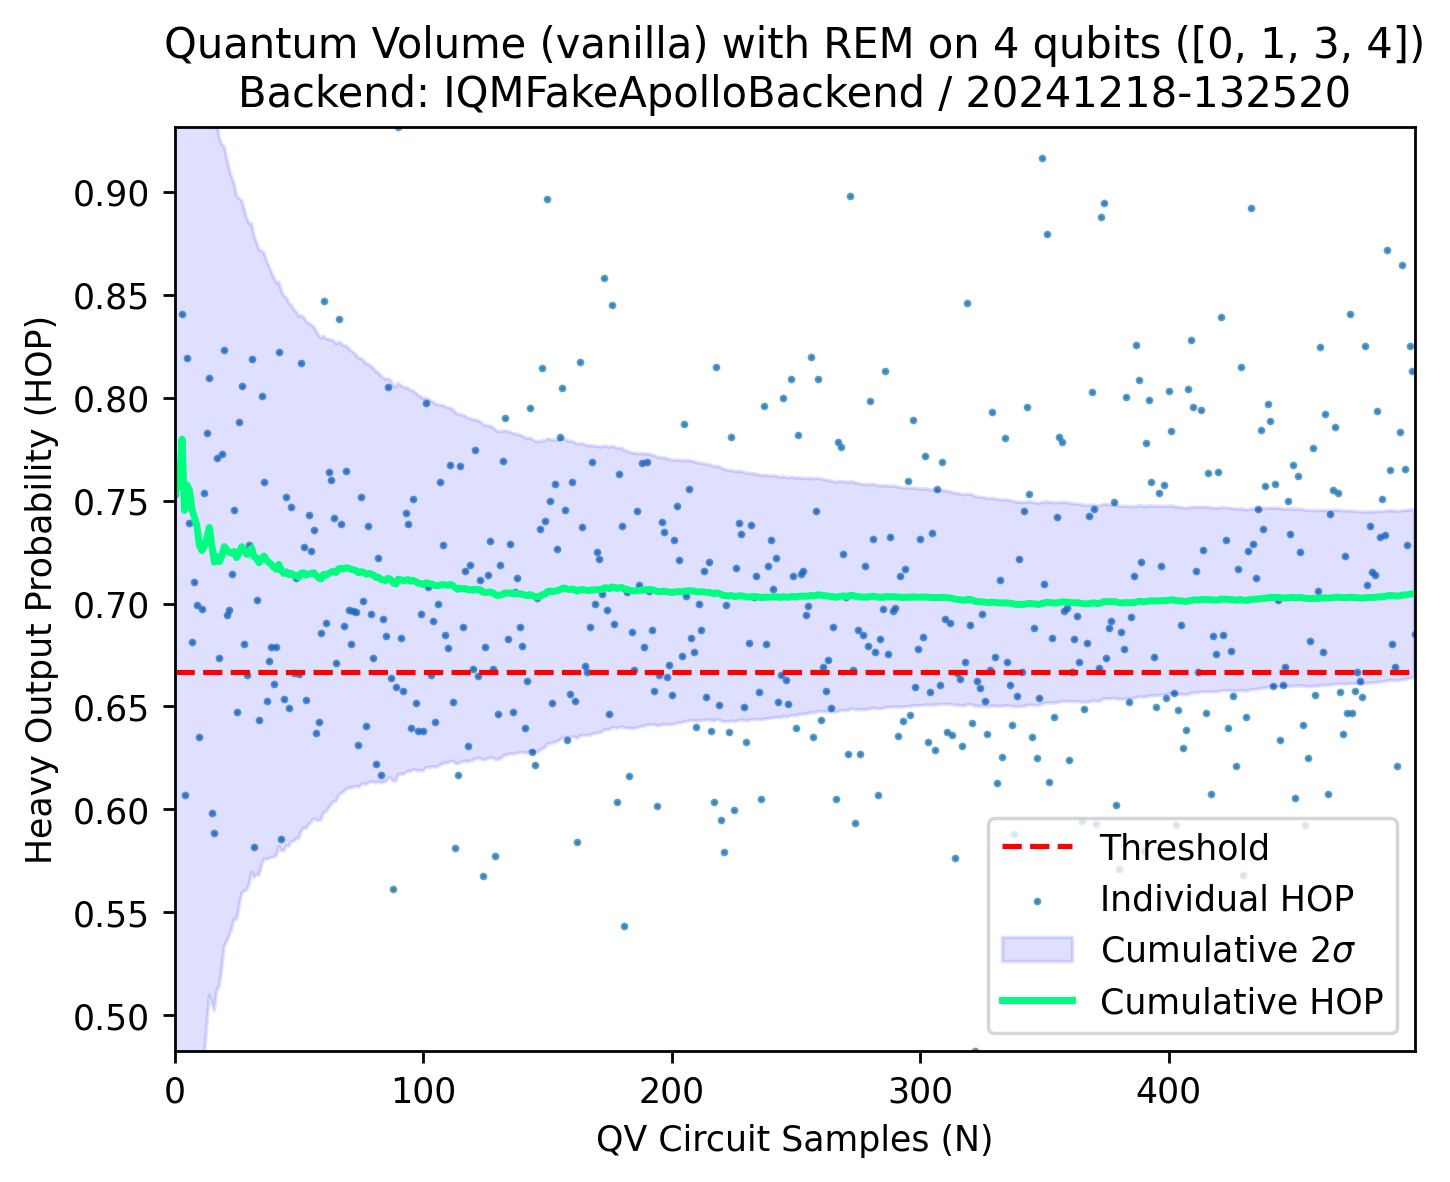

In [16]:
result0_qv.plot_all()